<a href="https://colab.research.google.com/github/RabihSouiden/Ciencias-de-a-computacion/blob/main/Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos pandas-profiling

In [ ]:
 pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

# Extraemos los datos

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv('Reporte_Lesiones_Personales_y_en_Accidente_de_Tr_nsito_Polic_a_Nacional.csv')
df = df.drop_duplicates()
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD
0,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,2.0
1,ANTIOQUIA,GIRARDOTA,5308000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,LESIONES PERSONALES,1.0
2,ANTIOQUIA,MUTATÁ,5480000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,MASCULINO,ADULTOS,LESIONES PERSONALES,1.0
3,ANTIOQUIA,NECOCLÍ,5490000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,1.0
4,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,2010-01-01,FEMENINO,ADULTOS,LESIONES PERSONALES,2.0
...,...,...,...,...,...,...,...,...,...
788173,SANTANDER,BUCARAMANGA (CT),68001000,VEHICULO,2019-03-17,FEMENINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),2.0
788174,SANTANDER,BUCARAMANGA (CT),68001000,VEHICULO,2019-03-17,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),2.0
788175,SANTANDER,LEBRIJA,68406000,VEHICULO,2019-03-17,FEMENINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1.0
788176,SANTANDER,PIEDECUESTA,68547000,VEHICULO,2019-03-17,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),2.0


# Generamos el Reporte para explorar los datos

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Punto 1
1.	¿Cuáles han sido los departamentos (TOP 3) más afectados a nivel histórico y en el último año?

Realizamos un filtrado sobre el ultimo año 2021
Se realiza un group by por departamento que no utilice indices nuevos, y nos sume la columna cantidad, la cual da la cantidad de delitps cometidos, luego organizamos los valores de cantidad de manera descendente y mostramos los 3 primeros datos

In [ ]:
a = df
a['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
cond1 = a['AÑO']== 2012
a = a[cond1]
a = a.groupby('DEPARTAMENTO', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
a

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,17463.0
29,VALLE,13354.0
26,SANTANDER,10076.0


# Punto 2
2.	¿Cuál ha sido históricamente el arma o medio más común para cometer el delito?

Realizamos una agrupación de los datos por el arma medio sin generar otro indice y sumando la columna cantidad, así organizamos los valores por este valor y mostramos los 3 primeros datos

In [ ]:
 b = df.groupby('ARMAS MEDIOS', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(3)
 b

,ARMAS MEDIOS,CANTIDAD
13,CONTUNDENTES,124311.0
32,VEHICULO,68151.0
21,MOTO,37659.0


# Punto 3
3.	¿Cómo es la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

Realizamos la agrupación por dos columnas, Fecha y Genero.
Y realizamos un pivot a esa tabla, el pivot nos permite buscar las variables categoricas de la columna dada (Genero) y sumar los valores de la columna cantidad

In [ ]:
#c = df[['GENERO','FECHA HECHO', 'CANTIDAD']]
c  = df.groupby(['FECHA HECHO', 'GENERO'])['CANTIDAD'].sum().reset_index()
#c.set_index('FECHA HECHO', inplace=True)
c = pd.pivot_table(c,index=["FECHA HECHO"], columns= 'GENERO', values='CANTIDAD')
c

GENERO,FEMENINO,MASCULINO,NO REPORTA
FECHA HECHO,,,
2010-01-01,313.0,670.0,1.0
2010-01-02,100.0,179.0,NaN
2010-01-03,97.0,190.0,NaN
2010-01-04,105.0,187.0,NaN
2010-01-05,115.0,243.0,NaN
...,...,...,...
2012-12-07,99.0,182.0,NaN
2012-12-08,134.0,285.0,NaN
2012-12-09,90.0,149.0,NaN


Una vez tenemos organizados los datos procedemos a gráficar para visualizar mejor entre cada uno de los generos su cantidad a lo largo del tiempo

Utilizamos la libreria *matplotlib*

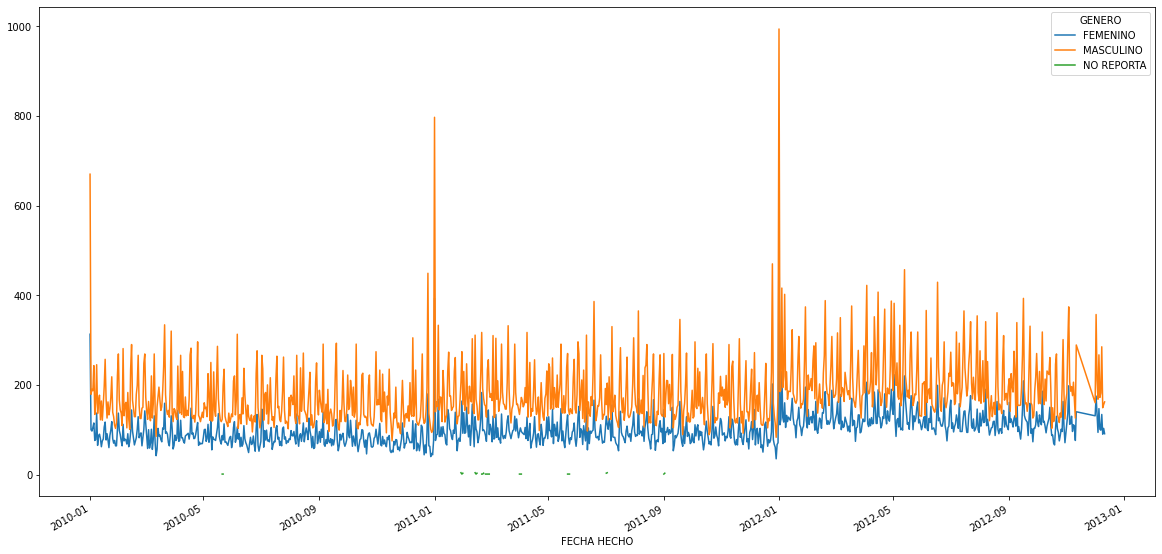

In [ ]:
import matplotlib.pyplot as plt

c.plot(figsize=(20,10));

# Punto 4
4.	¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

Para lograr resolver esta pregunta, primero separamos año y mes de la fecha de hecho.

In [ ]:
d = df
#d['FECHA HECHO'] = d['FECHA HECHO'].strftime('%Y-%m-%d')
d['AÑO'] = pd.DatetimeIndex(df['FECHA HECHO']).year
d['MES'] = pd.DatetimeIndex(df['FECHA HECHO']).month
d.tail()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DESCRIPCIÓN CONDUCTA,CANTIDAD,AÑO,MES
192137,HUILA,NEIVA (CT),41001000.0,VEHICULO,2012-12-11,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1.0,2012.0,12.0
192138,META,ACACÍAS,50006000.0,VEHICULO,2012-12-11,FEMENINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),1.0,2012.0,12.0
192139,META,ACACÍAS,50006000.0,VEHICULO,2012-12-11,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),2.0,2012.0,12.0
192140,NORTE DE SANTANDER,LOS PATIOS,54405000.0,VEHICULO,2012-12-11,MASCULINO,ADULTOS,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),2.0,2012.0,12.0
192141,R,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


Una vez tenemos los datos podemos agruparlos por el mes y sumar la cantidad de delitos de cada uno
Una vez obtenidos los datos en un dataframe procedemos a graficarlos

MES
1.0     29683.0
2.0     24951.0
3.0     26433.0
4.0     26005.0
5.0     26342.0
6.0     24556.0
7.0     26159.0
8.0     25390.0
9.0     24360.0
10.0    24116.0
11.0    18017.0
12.0    18513.0
Name: CANTIDAD, dtype: float64


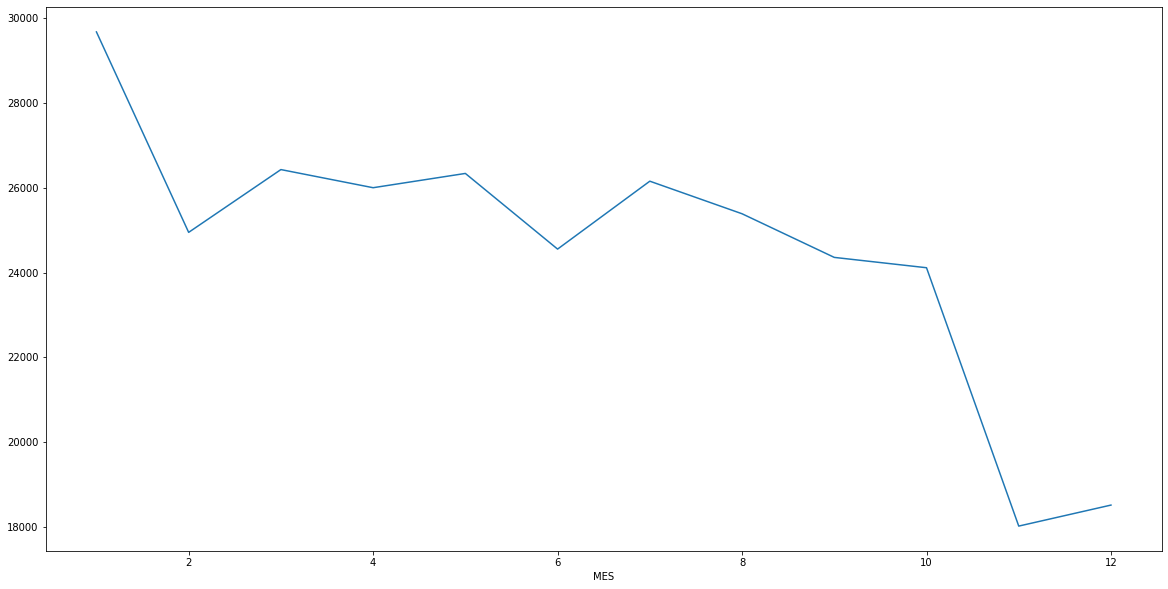

In [ ]:
d  = df.groupby(['MES'])['CANTIDAD'].sum()
print(d)
d.plot(figsize=(20,10))

# Punto 5
5.	Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son los delitos, descripciones o modalidades más comunes?

Para la solución de este punto se agrupo por la columna delito que lista cada uno de los delitos cometidos y sumamos la cantidad para así dar con el top de delitos de todos los tiempos

In [ ]:
e = df
e = e.groupby('DESCRIPCIÓN CONDUCTA', as_index=False)['CANTIDAD'].sum().sort_values(by=['CANTIDAD'], ascending=False).head(2)
e

,DESCRIPCIÓN CONDUCTA,CANTIDAD
2,LESIONES PERSONALES,874157.0
1,LESIONES CULPOSAS ( EN ACCIDENTE DE TRANSITO ),437307.0
